SECTION 2: BUSINESS-FOCUSED ANALYST PROJECTS
-------------------------------------------
2. Sales Data Analysis
   - Goal: Analyze sales by month, region, and product.
   - Dataset: Retail CSV dataset.
   - Tools: Pandas, Seaborn.
   - Skills: Grouping, aggregation, time-based analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


Loading and Understanding DATASET

In [3]:
# Loading Dataset 
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

# Displaying the first few rows of the dataset
print(df.head())

print(df.info())

print(df.describe())

# Checking for missing values
print("Checking Missing Values",df.isnull().sum())


   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

Cleaning Data

In [4]:
# dropping null column, so we can use dropna() to remove rows with any null values
df = df.drop('Unnamed: 0', axis=1)

# dropping rows with any null values
df.dropna(inplace=True)
df 

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [5]:

print(df.isnull().sum())


Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
dtype: int64


In [6]:
# lets change column names as first row

df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


Feature Engineering

In [7]:
# converting invoice date to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d/%m/%Y')


In [8]:
# extracting year month and date from invoice date
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,2020,1,1
5,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,2020,1,2
6,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1,3
7,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1,4
8,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet,2021,1,24
9648,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet,2021,1,24
9649,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet,2021,2,22
9650,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet,2021,2,22


In [9]:
# Converting Price Per Unit, Units Sold and Total Sales and Operating Profit to numeric
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')


In [10]:
df.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
Month               0
Day                 0
dtype: int64

Analyze and Visualize Sales by Month

In [11]:
# analyze and visualize sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
print(monthly_sales)

    Year  Month  Total Sales
0   2020      1   16253746.0
1   2020      2   14997988.0
2   2020      3   17660577.0
3   2020      4   24607006.0
4   2020      5   16918014.0
5   2020      6    8829819.0
6   2020      7   17146013.0
7   2020      8   19877980.0
8   2020      9   18304436.0
9   2020     10   10836269.0
10  2020     11    8622300.0
11  2020     12    8026527.0
12  2021      1   55225396.0
13  2021      2   46102165.0
14  2021      3   39148532.0
15  2021      4   47732964.0
16  2021      5   63589681.0
17  2021      6   65917553.0
18  2021      7   78334681.0
19  2021      8   72288221.0
20  2021      9   59357023.0
21  2021     10   53074764.0
22  2021     11   59235040.0
23  2021     12   77815430.0


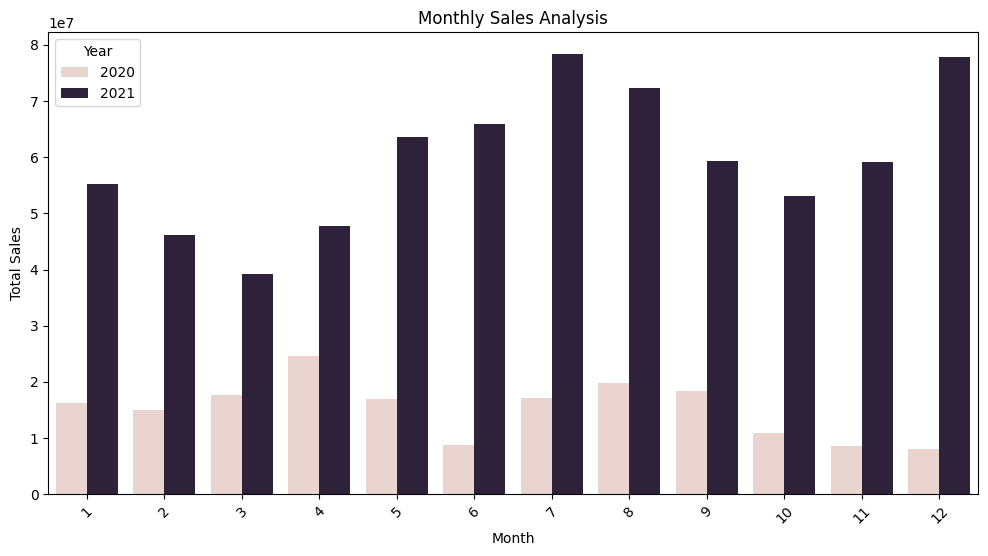

In [12]:
# plot monthly sales using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

Analyzing and Visualizing Sales by Region

In [13]:
# analyzing and visualizing sales by region
sales_by_region = df.groupby(['Region','City'])['Total Sales'].sum().reset_index()
print(sales_by_region)

       Region            City  Total Sales
0     Midwest        Billings   15710886.0
1     Midwest         Chicago    9797488.0
2     Midwest        Columbus   18484583.0
3     Midwest      Des Moines    7424011.0
4     Midwest         Detroit   18625433.0
5     Midwest           Fargo    7735580.0
6     Midwest    Indianapolis    8836198.0
7     Midwest       Milwaukee    7727469.0
8     Midwest     Minneapolis    7378068.0
9     Midwest           Omaha    5929038.0
10    Midwest     Sioux Falls    8495576.0
11    Midwest       St. Louis    9683265.0
12    Midwest         Wichita    9972864.0
13  Northeast          Albany   24427804.0
14  Northeast       Baltimore    7758059.0
15  Northeast          Boston   11076810.0
16  Northeast      Burlington   14352923.0
17  Northeast      Charleston   10689160.0
18  Northeast        Hartford   11573448.0
19  Northeast      Manchester   16411667.0
20  Northeast        New York   39801235.0
21  Northeast          Newark    9934246.0
22  Northea

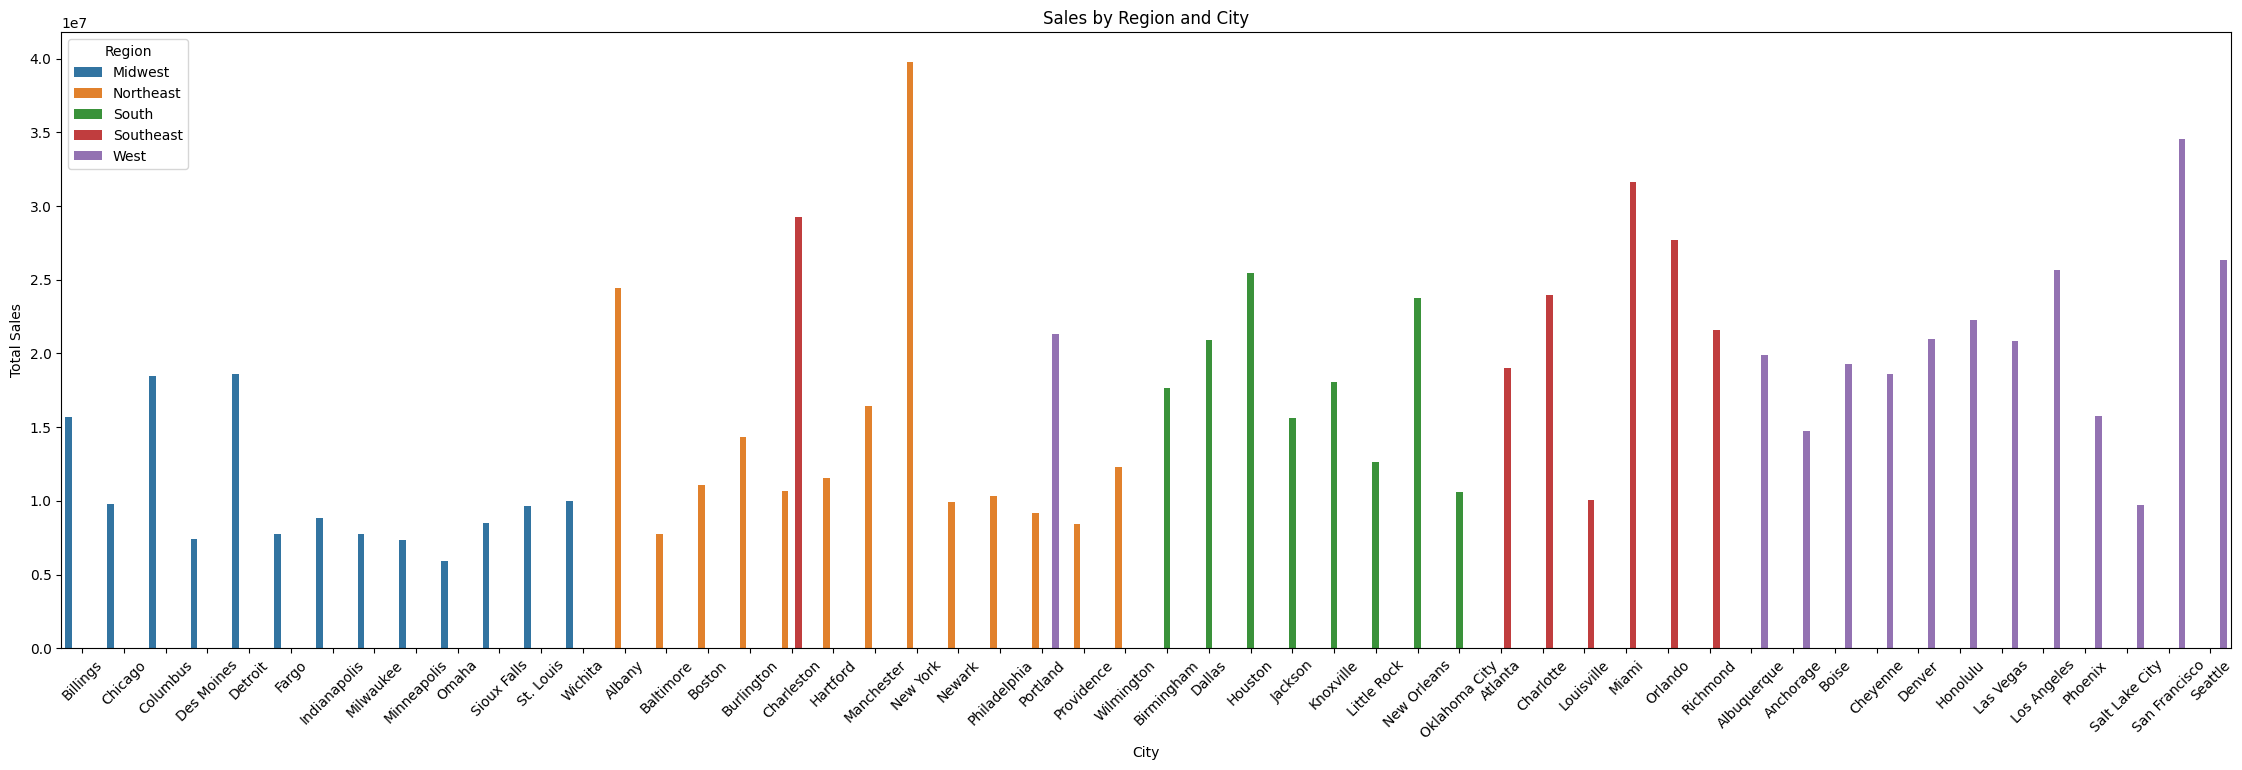

In [14]:
# visualizing sales by region and city using seaborn
plt.figure(figsize=(28, 8))
sns.barplot(x='City', y='Total Sales', hue='Region', data=sales_by_region)
plt.title('Sales by Region and City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

Analyzing and Visualizing Sales by Product

In [15]:
# analyzing and visualizing sales by product
sales_by_product = df.groupby('Product')['Units Sold'].sum().reset_index()
print(sales_by_product)

                     Product  Units Sold
0              Men's Apparel      306683
1    Men's Athletic Footwear      435526
2      Men's Street Footwear      593320
3            Women's Apparel      433827
4  Women's Athletic Footwear      317236
5    Women's Street Footwear      392269


C:\Users\pushk\AppData\Local\Temp\ipykernel_20284\4115115807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Units Sold', data=sales_by_product ,palette='rocket')


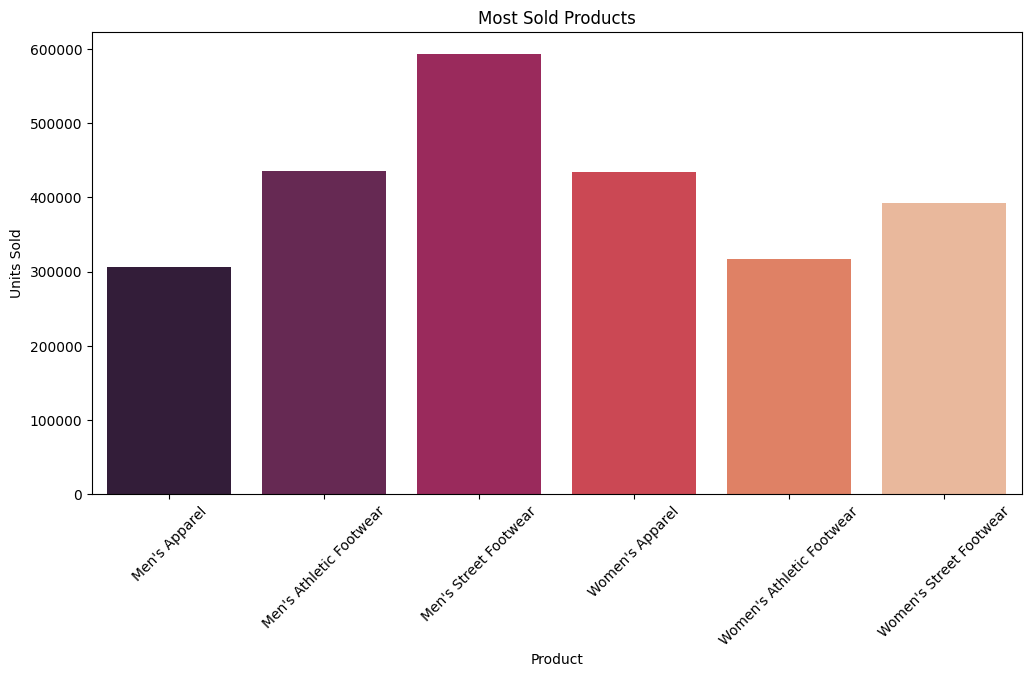

In [16]:
# visualizing sales by product using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Units Sold', data=sales_by_product ,palette='rocket')
plt.title('Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


In [17]:
# analyzing and visualizing price vs sales
price_sales = df.groupby('Product').agg({'Price per Unit': 'mean', 'Units Sold': 'sum'}).reset_index()
print(price_sales)


3                    Product  Price per Unit  Units Sold
0              Men's Apparel       50.321918      306683
1    Men's Athletic Footwear       43.779503      435526
2      Men's Street Footwear       44.236646      593320
3            Women's Apparel       51.600746      433827
4  Women's Athletic Footwear       41.112702      317236
5    Women's Street Footwear       40.252488      392269


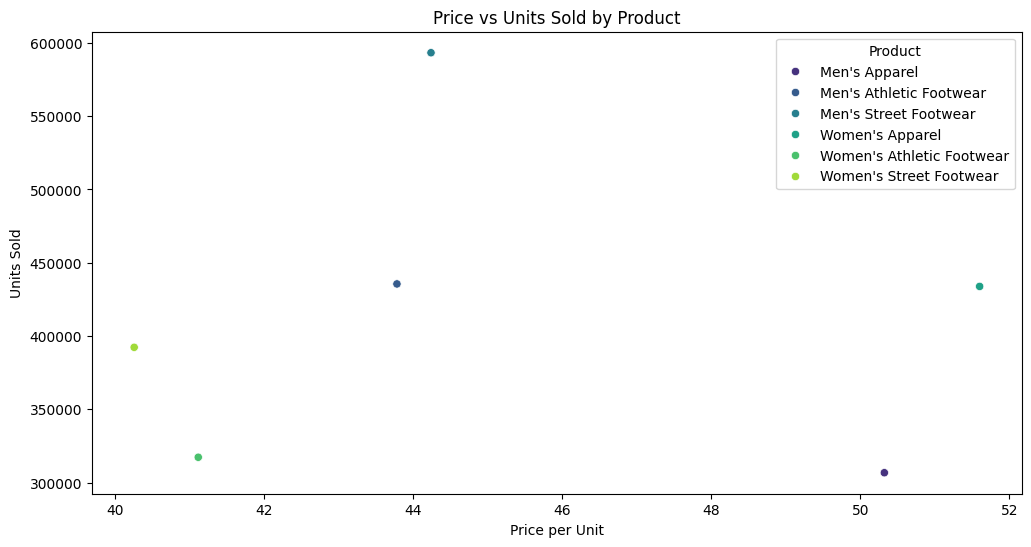

In [18]:
# visualizing price vs sales using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price per Unit', y='Units Sold', hue='Product', data=price_sales, palette='viridis')
plt.title('Price vs Units Sold by Product')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.legend(title='Product')
plt.show()

Analyzing Sales Methods

In [19]:
# analyzing sales methods
sales_methods = df.groupby('Sales Method')['Total Sales'].sum().reset_index()
print(sales_methods)

  Sales Method  Total Sales
0     In-store  356643750.0
1       Online  247672882.0
2       Outlet  295585493.0


C:\Users\pushk\AppData\Local\Temp\ipykernel_20284\4218205361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Method', y='Total Sales', data=sales_methods, palette='coolwarm')


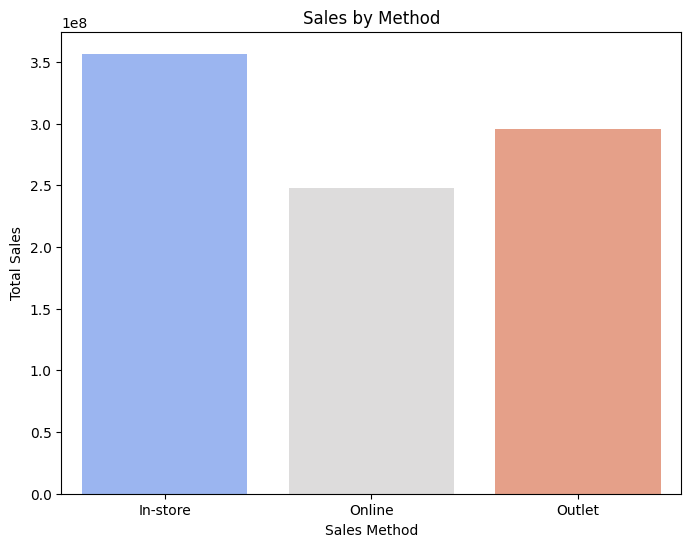

In [25]:
# visualizing sales methods
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales Method', y='Total Sales', data=sales_methods, palette='coolwarm')
plt.title('Sales by Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.show()

Insights:
   
1. Monthly Sales Trends:
    Analyzed total sales per month.

    Insight: Identify peak sales months (e.g., December or back-to-school season) and low-performance periods.

2. Sales by City or State:
    Top performing cities or states show concentration of demand.

    Insight: Useful for localized marketing and inventory decisions.

3. Top-Selling Products:
    Ranked products by Units Sold and Total Sales.

    Insight: “Men’s Street Footwear” and “Men’s Athletic Footwear” likely performed best — shows product popularity and customer focus.

4. Price vs Sales Volume:
    Plotted average price against quantity sold.

    Insight: Cheaper products often sold in larger volumes — price sensitivity affects customer buying behavior.

5. Sales Method Breakdown:
    From Sales Method (In-store, Outlet, Online),

    In Store sales method perform better.

    Data is suggesting company should focus on Online Presence.